<a href="https://colab.research.google.com/github/sayakpaul/MLP-Mixer-CIFAR10/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## References
* [MLP-Mixer: An all-MLP Architecture for Vision](https://arxiv.org/abs/2105.01601)
* [How to Visualize Filters and Feature Maps in Convolutional Neural Networks](https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/)

## Setup

In [1]:
!wget -q https://github.com/sayakpaul/MLP-Mixer-CIFAR10/releases/download/Models/models.zip
!unzip -qq models.zip

In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
mlp_mixer = tf.keras.models.load_model("mlp_mixer_4")
print("Model loaded.")

The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
Model loaded.


## Weights from Token-Mixing MLPs

In [4]:
indices_add = []
for i, layer in enumerate(mlp_mixer.layers):
    if isinstance(layer, tf.keras.layers.Add):
        print(f"Residual layer found at location: {i}")
        indices_add.append(i)

Residual layer found at location: 10
Residual layer found at location: 15
Residual layer found at location: 22
Residual layer found at location: 27
Residual layer found at location: 34
Residual layer found at location: 39
Residual layer found at location: 46
Residual layer found at location: 51


Token-mixing MLPs are placed before channel-mixing MLPs. Investigating the output of `mlp_mixer.summary()` confirms that output of the token-mixing MLPs are every odd-position of the above output followed by `Permute` and `Add` layers.

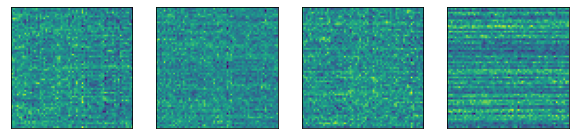

In [5]:
ix = 1
plt.figure(figsize=(10, 10))
for i, index in enumerate(indices_add):
    if i%2 == 0:
        weights, _ = mlp_mixer.layers[index - 2].get_weights()
        ax = plt.subplot(1, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(weights)
        ix += 1

## Linear-Projections

In [6]:
projections = mlp_mixer.layers[2].get_weights()[0]
p_min, p_max = projections.min(), projections.max()
projections = (projections - p_min) / (p_max - p_min)
projections.shape

(9, 9, 3, 128)

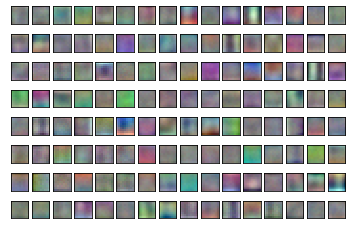

In [7]:
n_filters, ix = 128, 1
for i in range(n_filters):
    projection = projections[:, :, :, i]
    ax = plt.subplot(8, 16, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(projection)
    ix += 1